# Heart Attack

## Data Exploration and Preparation

Age : Age of the patient

Sex : Sex of the patient

exng: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0 = less chance of heart attack,  1 = more chance of heart attack

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
df = pd.read_csv('heart.csv')

In [30]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [33]:
df[df.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [34]:
df = df.drop_duplicates(keep = 'first')

In [35]:
# check for outliers
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
# check for outliers
df[(df['output'] != 0) & (df['output'] != 1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


## Data Visualization

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 164.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

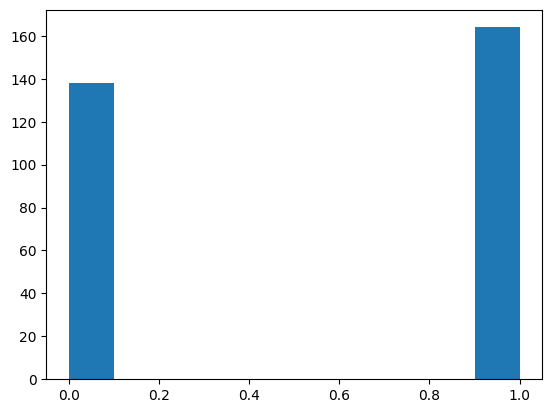

In [37]:
plt.hist(df['output'])

Hence, balanced dataset

Text(0.5, 1.0, 'Correlation Heatmap')

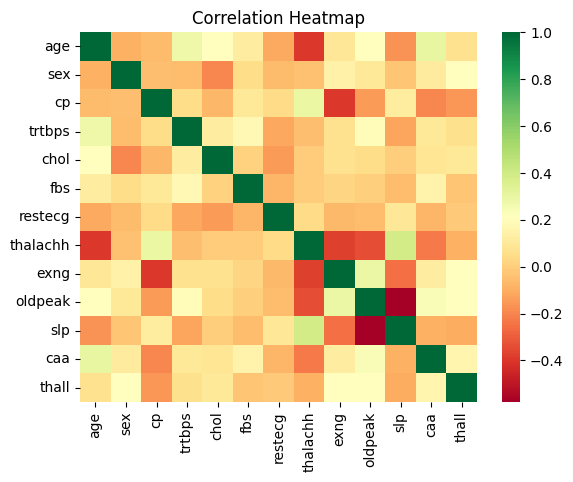

In [38]:
sns.heatmap(df.drop(columns = 'output').corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap')

## Feature Selection
### Using GridSearchCV to find best parameter for Lasso Regression

In [39]:
X = df.drop(columns = 'output')
y = df[['output']]

X_feature = X.values
y_feature = y.values
names = df.drop(columns = 'output').columns

# parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 10, 500)}

# setting KFold for Cross validation
kf = KFold(n_splits = 6, shuffle = True, random_state = 2024)

# Instantiate a lasso regression model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


### Plot Feature Selection

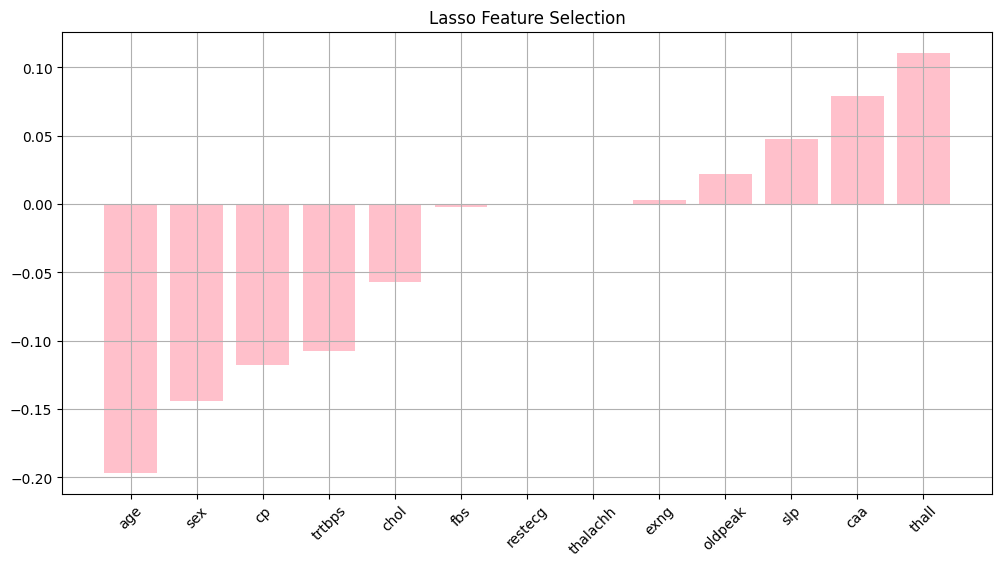

In [40]:
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_feature, y_feature) 
lasso_coef = np.sort(lasso.coef_)

plt.figure(figsize=(12, 6))
plt.bar(names, lasso_coef, color = 'pink')
plt.grid()
plt.title('Lasso Feature Selection')
plt.xticks(rotation=45)
plt.show()

Therefore, we will be using features: sex, exng, thall, caa, and cp

In [57]:
X = df[['sex', 'exng', 'thall', 'caa', 'cp']]
y = df['output']

## Data Prediction
As we need to minimize the numbers of people who actually are in risk for heart attack but got predicted as no risk, I will be prioritizing reducing False Negative (FN) and recall scores.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2024, stratify = y)

### Logistic Regression

In [76]:
log_reg = LogisticRegression(max_iter = 2000)

log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train.to_numpy(), cv = kf)

In [60]:
print(f'Accuracy of Logistic Regression Model for train dataset: {log_reg_cv_scores}')
print(f'Mean Accuracy for train dataset: {log_reg_cv_scores.mean()}')

Accuracy of Logistic Regression Model for train dataset: [0.77777778 0.88571429 0.88571429 0.91428571 0.71428571 0.71428571]
Mean Accuracy for train dataset: 0.8153439153439153


In [61]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [62]:
# Confusion Matrix
y_pred_log = log_reg.predict(X_test)

log_reg_con = confusion_matrix(y_test, y_pred_log)
log_reg_con = pd.DataFrame(log_reg_con, 
                     index=['True Negative', 'True Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
log_reg_con

,Predicted Negative,Predicted Positive
True Negative,33,9
True Positive,8,41


In [63]:
# Classification Report
log_reg_report = classification_report(y_test, y_pred_log)
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.82      0.84      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### KNearestNeighborsClassifier model

In [77]:
knn = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn, X_train, y_train.to_numpy(), cv = kf)

In [81]:
print(f'Accuracy of KNearestNeighborsClassifier Model for train dataset: {knn_cv_scores}')
print(f'Mean Accuracy for train dataset: {knn_cv_scores.mean()}')

Accuracy of KNearestNeighborsClassifier Model for train dataset: [0.80555556 0.88571429 0.77142857 0.8        0.77142857 0.8       ]
Mean Accuracy for train dataset: 0.8056878306878307


In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# Confusion Matrix
y_pred_knn = knn.predict(X_test)

knn_con = confusion_matrix(y_test, y_pred_knn)
knn_con = pd.DataFrame(knn_con, 
                     index=['True Negative', 'True Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
knn_con

,Predicted Negative,Predicted Positive
True Negative,30,12
True Positive,9,40


In [68]:
# Classification Report
knn_report = classification_report(y_test, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.77      0.82      0.79        49

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### RandomForest

In [78]:
param_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

forest = RandomForestClassifier()
forest_grid = RandomizedSearchCV(estimator=forest, param_distributions=param_forest, n_iter=100, cv=kf, verbose=0, random_state=2024)
forest_grid.fit(X_train, y_train.to_numpy())
print(forest_grid.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [79]:
y_pred = forest_grid.predict(X_test)
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.80      0.82      0.81        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



### Ploting Feature Importance

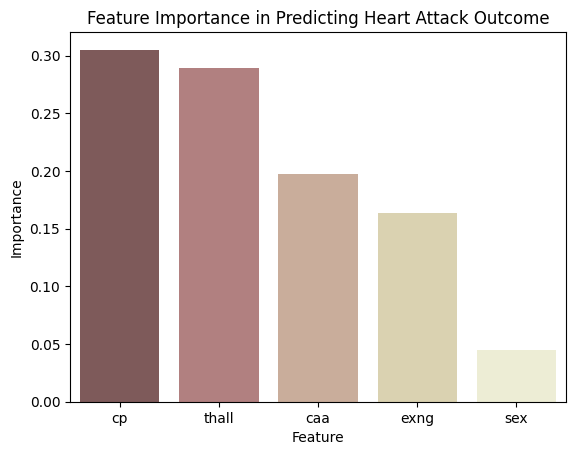

In [80]:
best_forest = forest_grid.best_estimator_
feature_importance = best_forest.feature_importances_
feature = X.columns

# Create dataframe for visualization
feature_df = pd.DataFrame({
    'Feature': feature,
    'Importance': feature_importance
    }).sort_values(by = 'Importance', ascending = False)

palette = sns.color_palette('pink', n_colors = len(feature_df))
sns.barplot(x = feature_df['Feature'], y = feature_df['Importance'], hue=feature_df['Feature'], palette=palette, legend=False)
plt.title('Feature Importance in Predicting Heart Attack Outcome')
plt.show()

This is not in line with lasso regression feature selection

#### The best model based on highest recall score is Logistic Regression model